### Choice function with the Iris dataset

In [ ]:
import pandas as pd 
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import warnings

date = pd.DatetimeIndex(np.arange('2019-01-01', '2019-02-20', dtype='datetime64[D]'))
X, y = load_iris(return_X_y=True, as_frame=True)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
y['target'] = y['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

data = pd.concat([X, y], axis=1)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
date_df = pd.DataFrame(date, columns=['date'])  

# taking 50 random samples of each target
setosa_sample = data[data['target'] == 'setosa']
setosa_sample = pd.concat([setosa_sample, date_df], axis=1)  
setosa_sample.reset_index(drop=True, inplace=True)
versicolor_sample = data[data['target'] == 'versicolor']
versicolor_sample.reset_index(drop=True, inplace=True)
versicolor_sample = pd.concat([versicolor_sample, date_df], axis=1)  
virginica_sample = data[data['target'] == 'virginica']
virginica_sample.reset_index(drop=True, inplace=True)
virginica_sample = pd.concat([virginica_sample, date_df], axis=1)  
data_2 = pd.concat([setosa_sample, versicolor_sample, virginica_sample])
data_2.sort_values(by='date', inplace=True)
data_2['probability'] = data_2['sepal_length']+data_2['sepal_width']+data_2['petal_length']+data_2['petal_width']
data_2 = data_2[['date','target', 'probability' ]]
data_2.set_index('date', inplace=True)
data_2.head(10)

,target,probability
date,,
2019-01-01,setosa,10.2
2019-01-01,versicolor,16.3
2019-01-01,virginica,18.1
2019-01-02,setosa,9.5
2019-01-02,versicolor,15.6
2019-01-02,virginica,15.5
2019-01-03,setosa,9.4
2019-01-03,versicolor,16.4
2019-01-03,virginica,18.1


In [ ]:
# pivoting the table for date 
data_2 = data_2.pivot(columns='target', values='probability')
data_2.head()

target,setosa,versicolor,virginica
date,,,
2019-01-01,10.2,16.3,18.1
2019-01-02,9.5,15.6,15.5
2019-01-03,9.4,16.4,18.1
2019-01-04,9.4,13.1,16.6
2019-01-05,10.2,15.4,17.5


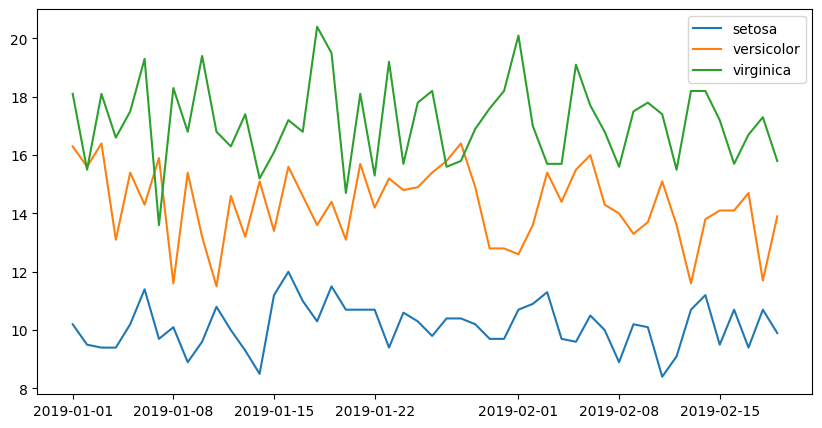

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data_2)
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

In [ ]:
data_2.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
setosa,50.0,10.142,0.784308,8.4,9.60,10.20,10.7,12.0
versicolor,50.0,14.292,1.290916,11.5,13.45,14.35,15.4,16.4
virginica,50.0,17.140,1.454760,13.6,15.80,17.20,18.1,20.4


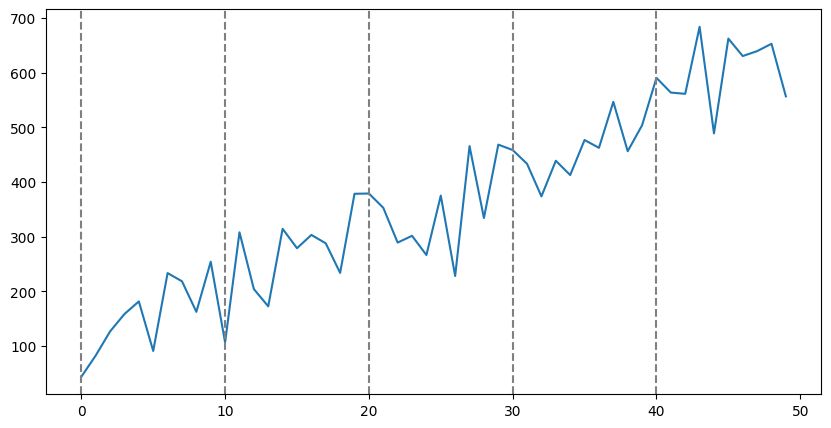

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

x2 = np.arange(0, 50)
slope_degrees = 15  # Desired slope in degrees
slope_radians = math.radians(slope_degrees)  # Convert degrees to radians
y2 = np.tan(slope_radians) * x2*40 + np.random.normal(0, 50, size=len(x2)) + np.cos(x2 / 50) + 100

    
# x2 times is the trend
# cos is the seasonality
# normal is the noise

plt.figure(figsize=(10, 5))
plt.plot(x2, y2)
for i in range(5):
    plt.axvline(x=i*10, color='grey', linestyle='--')
    

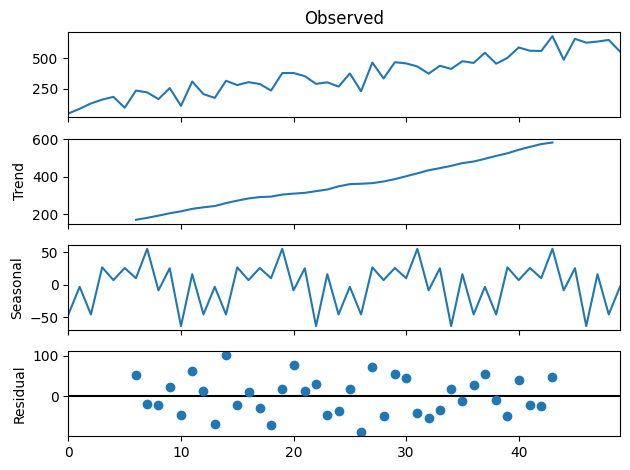

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

decompose = seasonal_decompose(y2,model='additive', period=12)
decompose.plot()
plt.show()

In [ ]:
data_2['order'] = y2
data_2['order'] = data_2['order'].apply(lambda x: max(x, 0))
for row in data_2.itertuples():
    data_2['setosa_2'] = (data_2['setosa']*data_2['order'])/(data_2['setosa']+data_2['versicolor']+data_2['virginica'])
    data_2['versicolor_2'] = (data_2['versicolor']*data_2['order'])/(data_2['setosa']+data_2['versicolor']+data_2['virginica'])
    data_2['virginica_2'] = (data_2['virginica']*data_2['order'])/(data_2['setosa']+data_2['versicolor']+data_2['virginica'])
data_2.drop(['setosa', 'versicolor', 'virginica'], axis=1, inplace=True)
data_2.columns = ['order','A', 'B', 'C']


data_2.head(10)

,order,A,B,C
date,,,,
2019-01-01,43.564598,9.963204,15.921591,17.679803
2019-01-02,82.460086,19.294848,31.684171,31.481067
2019-01-03,126.529240,27.092821,47.268326,52.168092
2019-01-04,158.396404,38.079954,53.068872,67.247578
2019-01-05,181.441159,42.939671,64.830484,73.671004
2019-01-06,90.784646,22.998777,28.849343,38.936526
2019-01-07,233.314030,57.733319,94.635028,80.945684
2019-01-08,218.325316,55.127142,63.314342,99.883832
2019-01-09,162.424191,35.172148,60.859673,66.392370


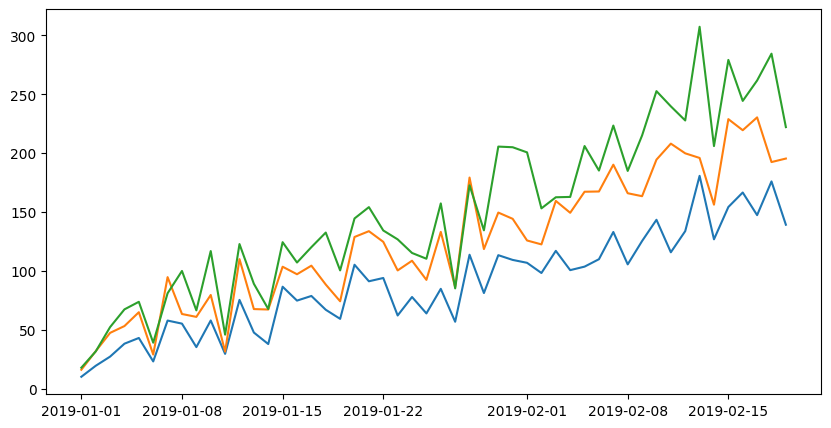

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data_2.drop(['order'], axis=1))

plt.show()

The dataset is ready

In [ ]:
order = data_2['order']

In [ ]:
# Imaging we have these as the probability of order of these folowers in a day
# and treatign it as a time series analysis we can find the trend
# first defining the choice probability by losgisctic regression
# step 1 : predict the probability of demand. 
# step 2: predict the choice based on the probability
# step 3: train the model



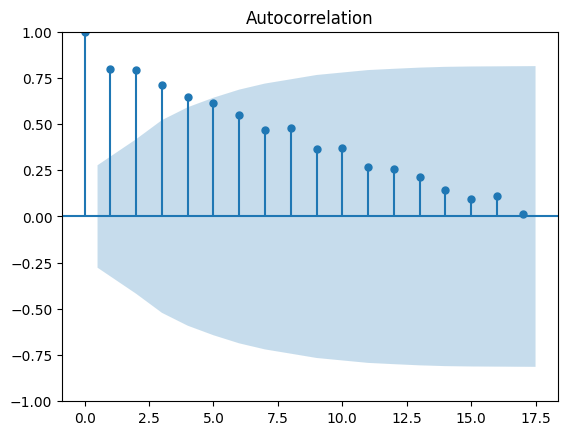

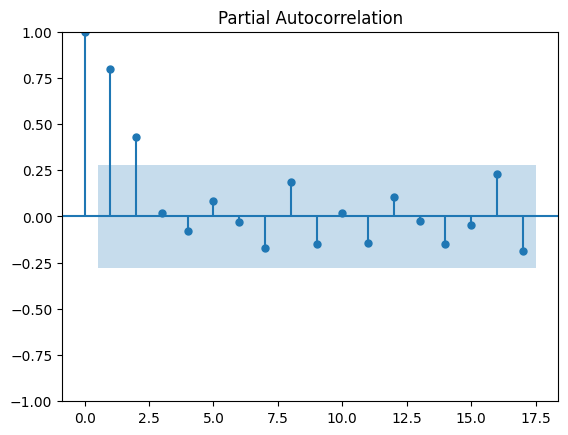

In [ ]:
# trend is upward
# non stationary
# ACF & PACF plots
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(order)
pacf_original = plot_pacf(order)

In [ ]:
# stationality test
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
    if dftest[1] <= 0.05:
        print("strong evidence against null hypothesis, reject null hypothesis")
        print("data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(order)


1. ADF :  -0.8799650117744476
2. P-Value :  0.7944986108875451
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 47
5. Critical Values :
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
lag= order- order.shift(1)

lag.dropna(inplace=True)

adf_test(lag)

1. ADF :  -9.009376654634597
2. P-Value :  6.185186758944389e-15
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 47
5. Critical Values :
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064
strong evidence against null hypothesis, reject null hypothesis
data has no unit root and is stationary


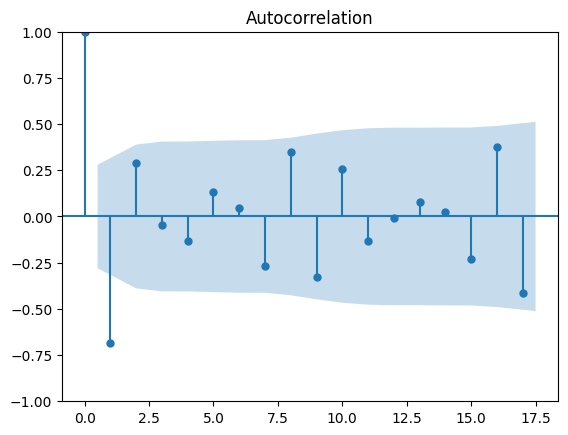

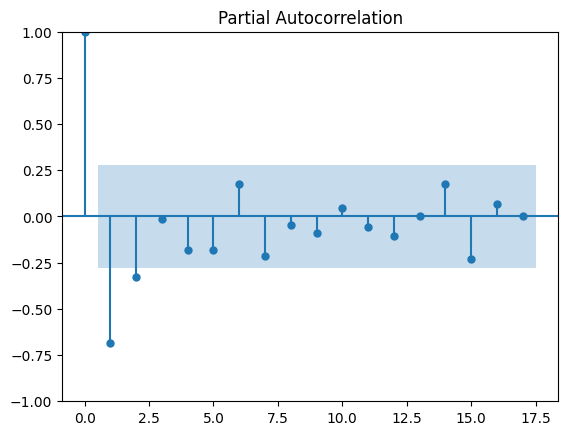

In [ ]:
acf_diff = plot_acf(lag)
pacf_diff = plot_pacf(lag)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

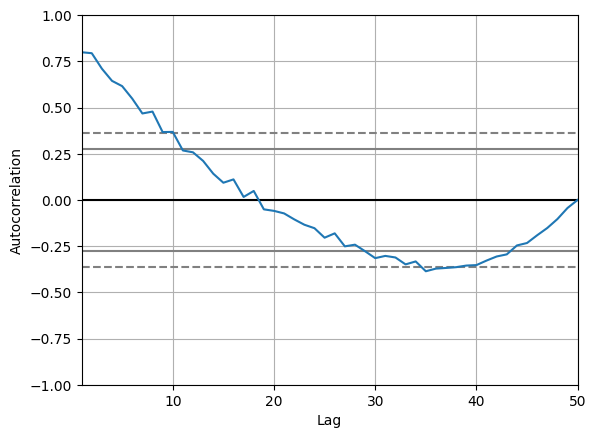

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(order)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import itertools
import warnings
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")


p = range(0, 8)
d = range(0, 2)
q = range(0, 8)

pdq = list(itertools.product(p, d, q))
results = []

train = order[:-10]
test = order[-10:]  

for param in pdq:
    try:
        model = SARIMAX(order, order=param, enforce_stationarity=False, enforce_invertibility=False, seasonal_order=(0, 0, 0, 0)).fit()
        start = len(train) - len(test)
        end = len(train) - 1
        PRED = model.predict(start=start, end=end)
        MSE = mean_squared_error(test, PRED)
        results.append({'pdq': param, 'AIC': model.aic, 'MSE': MSE})
    except:
        continue

df = pd.DataFrame(results)
print(df[df['MSE'] == df['MSE'].min()])
print(df[df['AIC'] == df['AIC'].min()])

          pdq         AIC           MSE
63  (3, 1, 7)  471.322012  23117.339031
           pdq        AIC          MSE
111  (6, 1, 7)  466.50708  23349.23197


In [ ]:
# Fitting the model
model = SARIMAX(order, order=(6, 1, 7), seasonal_order=(6, 1, 7, 12))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              order   No. Observations:                   50
Model:             SARIMAX(6, 1, 7)x(6, 1, 7, 12)   Log Likelihood                -204.023
Date:                            Sun, 10 Dec 2023   AIC                            462.046
Time:                                    18:23:47   BIC                            505.540
Sample:                                01-01-2019   HQIC                           477.379
                                     - 02-19-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3686     17.736     -0.021      0.983     -35.131      34.394
ar.L2         -0.3429     13.673     -0.025      0.980     -27.142      26.456
ar.L3          0.4947     15.809      0.031      0.975     -30.490      31.479
ar.L4         -0.1553     15.106     -0.010      0.992     -29.763      29.453
ar.L5          0.1818     16.268      0.011      0.991     -31.703      32.067
ar.L6         -0.4740     16.349     -0.029      0.977     -32.518      31.570
ma.L1         -0.6721      8.505     -0.079      0.937     -17.342      15.998
ma.L2          0.1849     19.826      0.009      0.993     -38.674      39.044
ma.L3         -0.9560     20.367     -0.047      0.963     -40.875      38.963
ma.L4          0.6499     19.964      0.033      0.974     -38.478      39.778
ma.L5         -0.1314     17.694     -0.007      0.994     -34.810      34.548
ma.L6          0.8843     17.464      0.051      0.960     -33.344      35.112
ma.L7         -0.5465     13.747     -0.040      0.968     -27.490      26.397
ar.S.L12      -0.2321   5458.353  -4.25e-05      1.000   -1.07e+04    1.07e+04
ar.S.L24      -0.1608    1.3e+04  -1.24e-05      1.000   -2.54e+04    2.54e+04
ar.S.L36       0.0988   4570.152   2.16e-05      1.000   -8957.235    8957.433
ar.S.L48       0.0319   3.27e+04   9.76e-07      1.000   -6.41e+04    6.41e+04
ar.S.L60       0.0276    5.8e+04   4.76e-07      1.000   -1.14e+05    1.14e+05
ar.S.L72      -0.0425   2.17e+04  -1.96e-06      1.000   -4.25e+04    4.25e+04
ma.S.L12      -0.3255   5385.244  -6.04e-05      1.000   -1.06e+04    1.06e+04
ma.S.L24      -0.1775    1.5e+04  -1.18e-05      1.000   -2.95e+04    2.95e+04
ma.S.L36       0.0776   1.12e+04   6.95e-06      1.000   -2.19e+04    2.19e+04
ma.S.L48       0.0192   2.54e+04   7.57e-07      1.000   -4.98e+04    4.98e+04
ma.S.L60      -0.0471   6.48e+04  -7.27e-07      1.000   -1.27e+05    1.27e+05
ma.S.L72       0.0358   1.12e+04    3.2e-06      1.000   -2.19e+04    2.19e+04
ma.S.L84      -0.0223   3.68e+04  -6.05e-07      1.000   -7.21e+04    7.21e+04
sigma2      3379.0112    366.775      9.213      0.000    2660.145    4097.877
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.76   Prob(JB):                         0.58
Heteroskedasticity (H):               0.76   Skew:                            -0.37
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.09e+19. Standard errors may be unstable.
"""

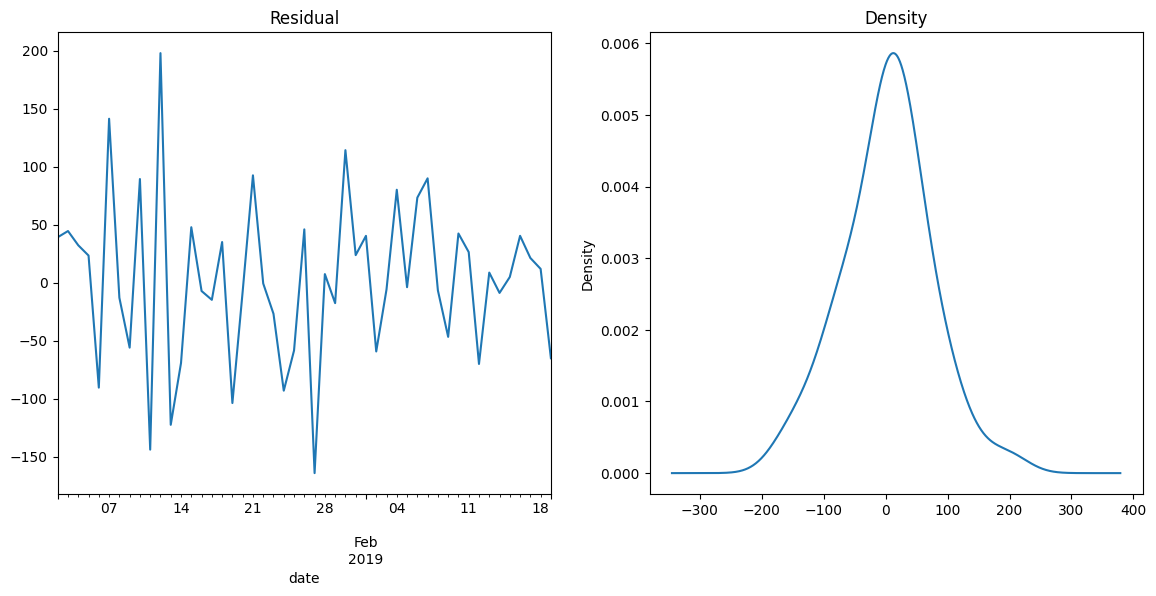

In [ ]:
residual = model_fit.resid[1:]
fig, ax = plt.subplots(1,2, figsize = (14,6))
residual.plot(title = 'Residual', ax = ax[0])
residual.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

In [ ]:
order.tail()

date
2019-02-15    662.374764
2019-02-16    630.454449
2019-02-17    639.472599
2019-02-18    652.952189
2019-02-19    556.716625
Name: order, dtype: float64

<Axes: xlabel='date'>

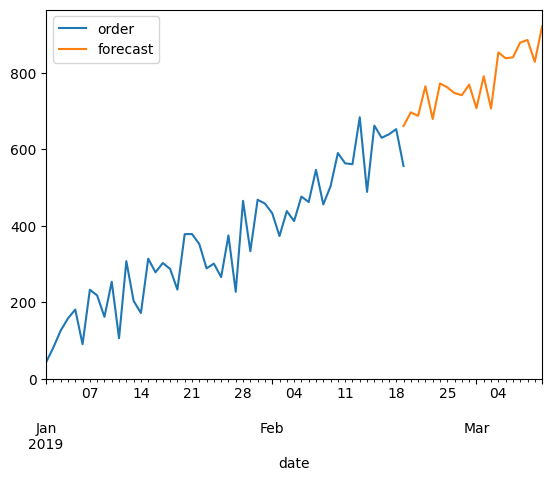

In [ ]:
# Forecast
order = pd.DataFrame(order)
order.columns = ['order']
forecast_20 = pd.date_range(start='2019-02-19', periods=20, freq='D')
forecast_test = model_fit.forecast(steps=len(forecast_20))  # Use 'steps' instead of 'len'

# Create a separate DataFrame for the forecast
forecast_data = pd.DataFrame({'forecast': list(forecast_test)}, index=forecast_20)

# Plot both 'order' and 'forecast'
ax = order.plot()
forecast_data.plot(ax=ax)


In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(order
                           , start_p=0
                           , start_q=0
                           , max_p=6
                           , max_q=6
                           , m=12
                           , seasonal=True
                           , d=1
                           , D=1
                           , trace=True
                           , error_action='ignore'
                           , suppress_warnings=True
                           , stepwise=True
                           , scoring='mse'
                           , information_criterion='aic'
                           , out_of_sample_size=20
                           , scoring_args={}
                           , with_intercept=False
                           )
auto_arima

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=463.028, Time=0.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=467.314, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=445.752, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=449.974, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=443.155, Time=0.35 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=445.246, Time=0.45 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=444.427, Time=0.29 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=462.506, Time=0.22 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=430.633, Time=0.45 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=432.563, Time=0.15 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=432.529, Time=0.60 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=in

ARIMA(order=(1, 1, 1), out_of_sample_size=20, scoring_args={},
      seasonal_order=(2, 1, 0, 12), suppress_warnings=True,
      with_intercept=False)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   50
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -212.762
Date:                            Sun, 10 Dec 2023   AIC                            435.523
Time:                                    18:23:57   BIC                            443.578
Sample:                                01-01-2019   HQIC                           438.363
                                     - 02-19-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9648      0.178     -5.409      0.000      -1.314      -0.615
ar.L2         -0.4918      0.165     -2.977      0.003      -0.816      -0.168
ar.S.L12      -0.6447      0.179     -3.600      0.000      -0.996      -0.294
ar.S.L24      -0.6539      0.289     -2.264      0.024      -1.220      -0.088
sigma2      3731.0600   2155.000      1.731      0.083    -492.662    7954.782
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.30
Prob(Q):                              0.88   Prob(JB):                         0.52
Heteroskedasticity (H):               1.41   Skew:                            -0.24
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

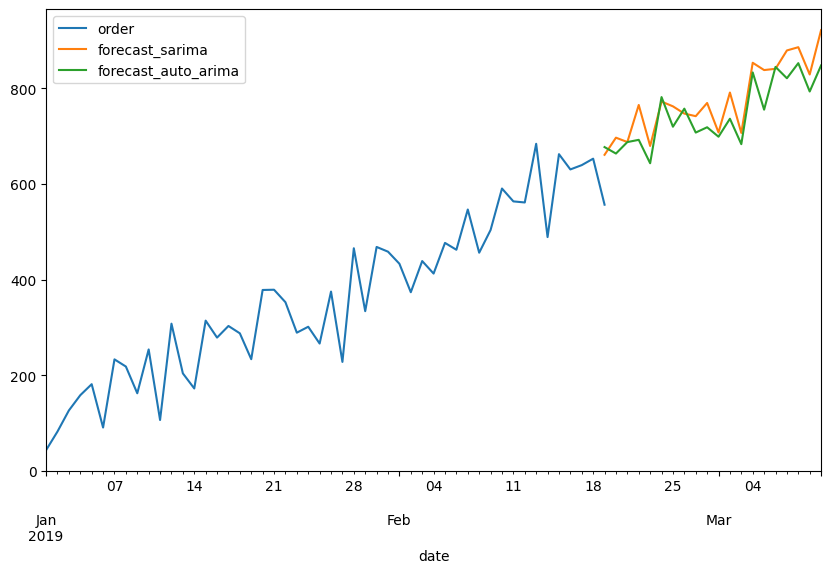

In [ ]:

forcast_auto_arima = auto_arima.predict(len(forecast_20))
# Create a separate DataFrame for the forecast
forecast_data = pd.DataFrame({'forecast_sarima': list(forecast_test)}, index=forecast_20)
forcast_auto_arima = pd.DataFrame({'forecast_auto_arima': list(forcast_auto_arima)}, index=forecast_20)
# Plot both 'order' and 'forecast'
ax = order.plot(legend=True)
forecast_data.plot(ax=ax, legend=True, figsize=(10, 6))
forcast_auto_arima.plot(ax=ax, legend=True)


now the model is trained and we ne know the aggrigate of expected demand.
now continuing with choice probability. 

In [ ]:
# now that the model is trained we can make predictions

# we need to predict the proabbile order for each type of parka
data_2.tail()

,order,A,B,C,Choice
date,,,,,
2019-02-15,662.374764,154.229418,228.908926,279.236420,C
2019-02-16,630.454449,166.564509,219.491549,244.398391,C
2019-02-17,639.472599,147.329471,230.398216,261.744912,C
2019-02-18,652.952189,175.984595,192.431753,284.535840,C
2019-02-19,556.716625,139.179156,195.413159,222.124310,C


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Create a target variable for category choice (e.g., 0 for A, 1 for B, 2 for C)
data_2['Choice'] = data_2[['A', 'B', 'C']].idxmax(axis=1)

# Split the data into features (order) and target (Choice)
X_train = data_2['order'][:-20]
X_test = data_2['order'][-20:]
y_train = data_2['Choice'][:-20]
y_test = data_2['Choice'][-20:]

# Create and fit a multinomial logistic regression model
model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

# Predict category choices on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


ValueError: Expected 2D array, got 1D array instead:
array=[ 43.56459766  82.4600859  126.52923976 158.39640354 181.44115894
  90.78464567 233.31403008 218.32531571 162.42419109 254.07844676
 106.56128854 307.99448317 204.0238222  172.47113326 314.32000075
 278.84450598 303.15162754 287.771102   233.6645841  378.42512029
 378.92576553 352.84234717 289.13395322 301.52748186 266.39062856
 375.10033707 228.01036337 465.62101041 334.04520636 468.39475566].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.